### Bibliotecas Úteis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import color_palette
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, recall_score

%matplotlib inline

### Leitura dos Dados

In [2]:
dados = pd.read_csv('dengue_pre_proc.csv',low_memory=False)
print(dados.shape)
dados.head()

(61370, 89)


,_id,dt_notificacao,co_uf_notificacao,co_municipio_notificacao,co_unidade_notificacao,dt_diagnostico_sintoma,dt_nascimento,tp_sexo,tp_gestante,tp_raca_cor,...,diabetes,hematolog,hepatopat,renal,hipertensao,acido_pept,auto_imune,notificao_dias,idade,caso_internacao
0,"ObjectId(""5ce365969db9b8440471220e"")",2014/01/17 00:00:00,26.0,261160.0,6481876.0,2013/02/25 00:00:00,2010/08/23 00:00:00,M,6.0,9.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,334.0,2.0,SIM
1,"ObjectId(""5ce365969db9b8440471220f"")",2014/04/10 00:00:00,26.0,261160.0,20516.0,2013/04/07 00:00:00,2000/06/10 00:00:00,F,9.0,9.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,365.0,12.0,SIM
2,"ObjectId(""5ce365969db9b84404712210"")",2014/01/07 00:00:00,26.0,261160.0,2802783.0,2013/09/08 00:00:00,1990/11/11 00:00:00,M,6.0,4.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,122.0,22.0,SIM
3,"ObjectId(""5ce365969db9b84404712211"")",2014/01/07 00:00:00,26.0,261160.0,6726852.0,2013/11/04 00:00:00,2009/04/10 00:00:00,F,6.0,9.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,61.0,4.0,SIM
4,"ObjectId(""5ce365969db9b84404712212"")",2014/01/17 00:00:00,26.0,261160.0,6481876.0,2013/11/05 00:00:00,1967/07/28 00:00:00,F,9.0,9.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,61.0,46.0,SIM


In [3]:
##dados.columns
dadosVariaveis = dados[['_id','febre', 'mialgia', 'cefaleia', 'exantema', 'vomito', 'nausea','dor_costas', 'conjutivite', 'artrite', 'artralgia', 'petequia_n','leucopenia', 'laco', 'dor_retro', 'diabetes', 'hematolog', 'hepatopat','renal', 'hipertensao', 'acido_pept', 'auto_imune','idade', 'caso_internacao']]

In [4]:
# 23 variaveis - uma dependente e o resto independente
dadosVariaveis.shape

(61370, 24)

In [5]:
dadosVariaveis.head()
print(dadosVariaveis.columns)

Index(['_id', 'febre', 'mialgia', 'cefaleia', 'exantema', 'vomito', 'nausea',
       'dor_costas', 'conjutivite', 'artrite', 'artralgia', 'petequia_n',
       'leucopenia', 'laco', 'dor_retro', 'diabetes', 'hematolog', 'hepatopat',
       'renal', 'hipertensao', 'acido_pept', 'auto_imune', 'idade',
       'caso_internacao'],
      dtype='object')


In [6]:
dadosVariaveis.caso_internacao.value_counts()

NAO    49373
SIM    11995
Name: caso_internacao, dtype: int64

   ### Escolhendo subset de Treino

In [7]:
#for linha in dadosVariaveis:
   # dadosVariaveis['Treino'] = None

In [8]:
dadosVariaveis.head()

,_id,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,artrite,...,dor_retro,diabetes,hematolog,hepatopat,renal,hipertensao,acido_pept,auto_imune,idade,caso_internacao
0,"ObjectId(""5ce365969db9b8440471220e"")",2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,SIM
1,"ObjectId(""5ce365969db9b8440471220f"")",2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,12.0,SIM
2,"ObjectId(""5ce365969db9b84404712210"")",2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,22.0,SIM
3,"ObjectId(""5ce365969db9b84404712211"")",2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,SIM
4,"ObjectId(""5ce365969db9b84404712212"")",2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,46.0,SIM


#### Divisão dos dados em treino e teste

In [9]:
train = dadosVariaveis.sample(frac=0.8,random_state=200)
test= dadosVariaveis.drop(train.index)

In [10]:
print('Usando 80% do dataset para treino')
train.shape

Usando 80% do dataset para treino


(49096, 24)

In [11]:
print('Quantidade de casos de internação dentro do dataset de treino')
train.caso_internacao.value_counts()

Quantidade de casos de internação dentro do dataset de treino


NAO    39496
SIM     9598
Name: caso_internacao, dtype: int64

In [12]:
print('Usando 20% do dataset para teste')
test.shape

Usando 20% do dataset para teste


(12274, 24)

In [13]:
print('Quantidade de casos de internação dentro do dataset de teste')
test.caso_internacao.value_counts()

Quantidade de casos de internação dentro do dataset de teste


NAO    9877
SIM    2397
Name: caso_internacao, dtype: int64

### Regressão

In [25]:
treinoCP = sm.add_constant(train.copy())
treinoCP['Ip'] = treinoCP.caso_internacao.map(lambda x: x== 'SIM' and 1 or 0)
model = smf.logit("Ip ~ febre + mialgia + cefaleia + exantema + vomito + nausea + dor_costas + conjutivite + artrite + artralgia + petequia_n + leucopenia + laco + dor_retro + diabetes + hematolog + hepatopat + renal + hipertensao + acido_pept + auto_imune + idade",data=treinoCP).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.456731
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Ip   No. Observations:                49094
Model:                          Logit   Df Residuals:                    49071
Method:                           MLE   Df Model:                           22
Date:                Mon, 24 Jun 2019   Pseudo R-squ.:                 0.07564
Time:                        01:42:55   Log-Likelihood:                -22423.
converged:                       True   LL-Null:                       -24258.
                                        LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.9053      1.359      3.608      0.000       2.241       7.570
febre          -1.2290      0.050    -24.458      0.000      -1.327      -1.131
mialgia        -0.4571      0.046     -9.959      0.000      -0.547      -0.367
cefaleia       -0.2268      0.046     -4.935      0.000      -0.317      -0.137
exantema        0.4354      0.051      8.589      0.000       0.336       0.535
vomito         -0.4172      0.050     -8.359      0.000      -0.515      -0.319
nausea          0.3488      0.057      6.136      0.000       0.237       0.460
dor_costas     -0.1785      0.084     -2.131      0.033      -0.343      -0.014
conjutivite     0.7034      0.151      4.666      0.000       0.408       0.999
artrite         0.4514      0.102      4.443      0.000       0.252       0.650
artralgia       1.0678      0.045     23.927      0.000       0.980       1.155
petequia_n     -0.6797      0.127     -5.346      0.000      -0.929      -0.431
leucopenia     -1.6024      0.136    -11.781      0.000      -1.869      -1.336
laco            0.6501      0.328      1.984      0.047       0.008       1.292
dor_retro       0.0029      0.067      0.043      0.965      -0.128       0.134
diabetes       -0.6934      0.245     -2.834      0.005      -1.173      -0.214
hematolog      -0.1661      0.433     -0.384      0.701      -1.015       0.683
hepatopat      -0.3313      0.341     -0.971      0.332      -1.000       0.338
renal          -0.3417      0.470     -0.727      0.467      -1.263       0.579
hipertensao    -1.1251      0.171     -6.569      0.000      -1.461      -0.789
acido_pept     -0.0354      0.328     -0.108      0.914      -0.679       0.608
auto_imune      0.4581      0.553      0.829      0.407      -0.625       1.541
idade           0.0024      0.001      3.894      0.000       0.001       0.004
===============================================================================
"""

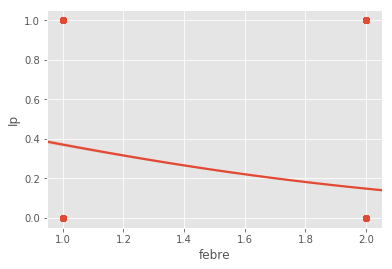

In [23]:
sns.regplot(x='febre',y='Ip',logistic=True,data=treinoCP)

### Predizer os Valores de Teste

In [24]:
model.predict(test)

2        0.145059
3        0.139800
4        0.152326
5        0.143877
17       0.145356
22       0.140666
37       0.143288
49       0.138653
52       0.138653
56       0.150176
59       0.151402
60       0.161178
69       0.148656
71       0.145356
74       0.150176
88       0.144467
96       0.140377
105      0.160210
129      0.161826
132      0.154814
133      0.152326
137      0.145654
144      0.152017
147      0.152635
151      0.145356
158      0.146849
163      0.156070
168      0.146250
171      0.157018
174      0.152635
           ...   
61242    0.153902
61243    0.432773
61244    0.300126
61247    0.445736
61248    0.264291
61260    0.311117
61274    0.148959
61277    0.640585
61289    0.221510
61293    0.232197
61297    0.262898
61302    0.227547
61303    0.140088
61305    0.448757
61312    0.351830
61315    0.527820
61320    0.517077
61326    0.808261
61331    0.514089
61336    0.840940
61342    0.180174
61343    0.514687
61345    0.236922
61346    0.804736
61350    0

Como podemos ver, o modelo retorna as <strong>probabilidades associadas</strong> a cada objeto no conjunto de teste de <strong>terem sido internados!</strong>
Podemos converter tais probabilidades em classes. Podemos arbitrariamente dizer que se a probabilidade for <strong>maior que 0.5</strong> então a classe é <strong>sim para internação</strong>, e <strong>negativa caso contrário.</strong>

In [17]:
model.predict(test).map(lambda x: x > 0.5 and 'Caso de Internação' or 'Sem internação')

2            Sem internação
3            Sem internação
4            Sem internação
5            Sem internação
17           Sem internação
22           Sem internação
37           Sem internação
49           Sem internação
52           Sem internação
56           Sem internação
59           Sem internação
60           Sem internação
69           Sem internação
71           Sem internação
74           Sem internação
88           Sem internação
96           Sem internação
105          Sem internação
129          Sem internação
132          Sem internação
133          Sem internação
137          Sem internação
144          Sem internação
147          Sem internação
151          Sem internação
158          Sem internação
163          Sem internação
168          Sem internação
171          Sem internação
174          Sem internação
                ...        
61242        Sem internação
61243        Sem internação
61244        Sem internação
61247        Sem internação
61248        Sem int

#### Comparando os valores originais com a predição

In [18]:
df = pd.DataFrame(dict(prob=model.predict(test),
                  pred=model.predict(test).map(lambda x: x > 0.5 and 'Caso de Internação' or 'Sem internação'),
                  real=test.caso_internacao))

In [19]:
df['caso_internacao'] = test.caso_internacao
df

,prob,pred,real,caso_internacao
2,0.145058,Sem internação,SIM,SIM
3,0.139800,Sem internação,SIM,SIM
4,0.152322,Sem internação,SIM,SIM
5,0.143875,Sem internação,SIM,SIM
17,0.145355,Sem internação,SIM,SIM
22,0.140665,Sem internação,SIM,SIM
37,0.143287,Sem internação,SIM,SIM
49,0.138654,Sem internação,SIM,SIM
52,0.138654,Sem internação,SIM,SIM
56,0.150173,Sem internação,SIM,SIM


Podemos ainda sumarizar os resultados numa tabela, mostrando os acertos e erros do modelo.

In [20]:
pd.crosstab(df.pred,df.real)

real,NAO,SIM
pred,,
Caso de Internação,281,426
Sem internação,9596,1971


In [21]:
tabcont = pd.crosstab(df.pred,df.real).values
acc = np.sum(tabcont.diagonal())/test.shape[0]
sen = tabcont[1,1]/(tabcont[1,1]+tabcont[0,1])
esp = tabcont[0,0]/(tabcont[0,0]+tabcont[1,0])

print("acc= {:.3f}, sen={:.3f}, esp={:.3f}".format(acc,sen,esp))

acc= 0.183, sen=0.822, esp=0.028
